In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

%matplotlib inline


In [ ]:
df = pd.read_csv('events_log.csv')
df['timestamp'] = df['timestamp'].astype(int)
pd.DataFrame.to_csv(df,'events_log_.csv')

In [3]:
df = pd.read_csv('events_log_.csv', parse_dates=['timestamp'], index_col='timestamp')

In [5]:
df.head()

,Unnamed: 0,uuid,session_id,group,action,checkin,page_id,n_results,result_position
timestamp,,,,,,,,,
2016-03-01 10:38:42,0,00000736167c507e8ec225bd9e71f9e5,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
2016-03-07 00:52:26,1,00000c69fe345268935463abbfa5d5b3,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2016-03-02 14:53:05,2,00003bfdab715ee59077a3670331b787,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
2016-03-02 22:27:01,3,0000465cd7c35ad2bdeafec953e08c1a,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
2016-03-02 09:50:23,4,000050cbb4ef5b42b16c4d2cf69e6358,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


1. What is our daily overall clickthrough rate? How does it vary between the groups?
    * find clickthrough rates (visitPage/searchResultPage)
    * divide the data into daily summary
    * plot it divided into group A and B
2. Which results do people tend to try first? How does it change day-to-day?
3. What is our daily overall zero results rate? How does it vary between the groups?
4. Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.
5. Summarize your findings in an executive summary.

### 1. Question 1: 
### What is our daily overall clickthrough rate? How does it vary between the groups?

Daily clickthrough rate is calculated as a proportion \begin{equation*}CRT = \frac{clickedResults}{allSearchResults}\end{equation*}

In [6]:
clickthroughrate = []
clickthroughratea = []
clickthroughrateb = []

for i, d in df.groupby([df.index.day,df.group]):
    clickthroughrate.append(float(len(d['action'][d['action'] == 'visitPage'])) / float(len(d['action'][d['action'] == 'searchResultPage'])))
    if d['group'][0]=='a':
        clickthroughratea.append(float(len(d['action'][d['action'] == 'visitPage'])) / float(len(d['action'][d['action'] == 'searchResultPage'])))
    else:
        clickthroughrateb.append(float(len(d['action'][d['action'] == 'visitPage'])) / float(len(d['action'][d['action'] == 'searchResultPage'])))
        
mean_CRT = sum(clickthroughrate)/len(clickthroughrate)
mean_CRT_A = sum(clickthroughratea)/len(clickthroughratea)
mean_CRT_B = sum(clickthroughrateb)/len(clickthroughrateb)

error_overall = stats.sem(clickthroughrate)
error_a = stats.sem(clickthroughratea)
error_b = stats.sem(clickthroughrateb)

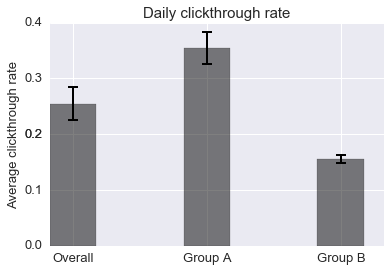

In [92]:
CRT = [mean_CRT, mean_CRT_A, mean_CRT_B]
error_ = [error_overall, error_a, error_b]

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(range(len(CRT)), CRT, bar_width, color='k', alpha=0.5, yerr=error_, error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))

plt.title('Daily clickthrough rate', size=15)

plt.ylabel('Average clickthrough rate', size=13)

plt.xticks(index + bar_width / 2, ('Overall', 'Group A','Group B'), size =13)
plt.yticks(np.round(np.linspace(0,max(CRT)+0.05,6),1),  size =13)
plt.legend()

### 2. Question 
### Which results do people tend to try first? How does it change day-to-day?


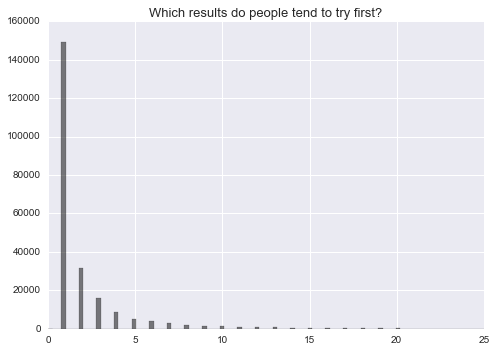

In [80]:
bins = numpy.linspace(0, 25, 100)
fig = plt.figure(figsize = [7,5])
plt.plot
df['result_position'][df['result_position'].notnull()].hist(color='k', alpha=0.5, bins=bins)
#plt.xlim([-3, 25])
plt.title('Which results do people tend to try first?', size=13)

plt.tight_layout()
plt.show()

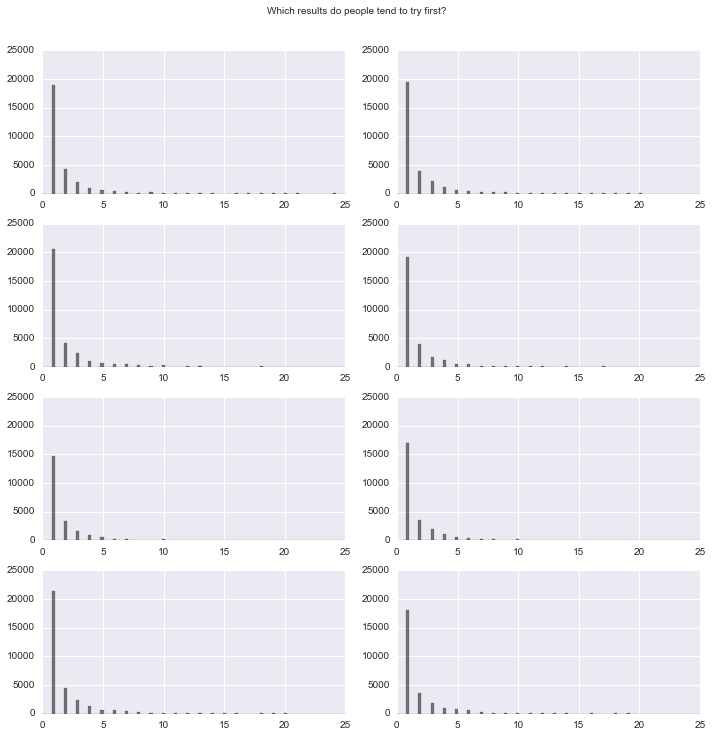

In [85]:
fig = plt.figure(figsize = [10,20])

plt.suptitle('Which results do people tend to try first?', size=20)

for i, d in df.groupby([df.index.day]):
    #print i
    plt.subplot(8,2,i)

    d['result_position'][d['result_position'].notnull()].hist(color='k', alpha=0.5, bins=bins)
    plt.ylim([0, 25000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

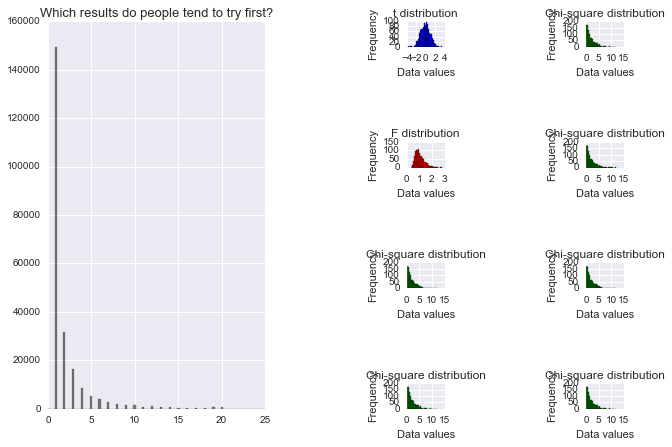

In [86]:
import matplotlib.gridspec as gridspec

# Generate data
dist_norm = np.random.normal(loc=0, scale=1, size=1000)
dist_tdis = np.random.standard_t(df=29, size=1000)
dist_fdis = np.random.f(dfnum=59, dfden=28, size=1000)
dist_chsq = np.random.chisquare(df=2, size=1000)

bins = numpy.linspace(0, 25, 100)

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
plt.title('Which results do people tend to try first?', size=13)
df['result_position'][df['result_position'].notnull()].hist(color='k', alpha=0.5, bins=bins)

# small subplot 1
plt.subplot2grid((4,4), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=30, color='b')

# small subplot 2
plt.subplot2grid((4,4), (1,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('F distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_fdis, bins=30, color='r')

# small subplot 3
plt.subplot2grid((4,4), (2,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# small subplot 4
plt.subplot2grid((4,4), (3,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# small subplot 4
plt.subplot2grid((4,4), (0,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# small subplot 4
plt.subplot2grid((4,4), (1,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# small subplot 4
plt.subplot2grid((4,4), (2,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# small subplot 4
plt.subplot2grid((4,4), (3,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Chi-square distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_chsq, bins=30, color='g')

# fit subplots and save fig
fig.tight_layout()
#
fig.set_size_inches(w=10,h=7)
#fig_name = 'plot.png'
#fig.savefig(fig_name)

### 3. What is our daily overall zero results rate? How does it vary between the groups?

Zero results rate can be defined as the proportion of searches that yielded 0 results.

In [87]:
zero_results_a=[]
zero_results_b=[]
for i, d in df.groupby([df.index.day,df.group]):
    if d['group'][0]=='a':
        zero_results_a.append(float(len(d['n_results'][d['n_results'] == 0])) / float(len(d['action'][d['action'] == 'searchResultPage'])))
    else:
        zero_results_b.append(float(len(d['n_results'][d['n_results'] == 0])) / float(len(d['action'][d['action'] == 'searchResultPage'])))

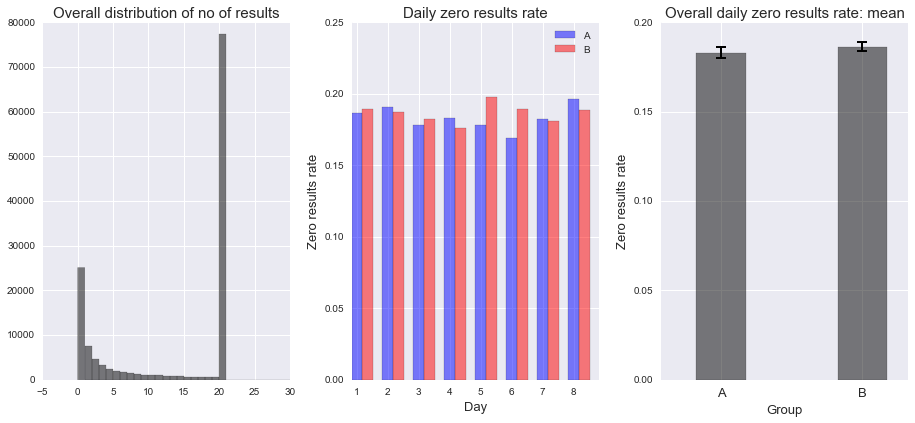

In [163]:
fig = plt.figure(figsize = [13,6])

plt.subplot(1,3,1)
df['n_results'].hist(color='k', alpha=0.5, bins=500)
plt.xlim([-5, 30])
plt.title('Overall distribution of no of results', size=15)

plt.subplot(1,3,2)
index = np.arange(8)
bar_width = 0.35

rects1 = plt.bar(index, zero_results_a, bar_width,
                 alpha=0.5,
                 color='b',
                 label='A')

rects2 = plt.bar(index + bar_width, zero_results_b, bar_width,
                 alpha=0.5,
                 color='r',
                 label='B')

plt.ylim([0, 0.25])
plt.title('Daily zero results rate', size=15)

plt.xlabel('Day', size=13)
plt.ylabel('Zero results rate', size=13)

plt.xticks(index + bar_width / 2, ('1', '2', '3', '4', '5','6','7','8'))
plt.legend()

ax = plt.subplot(1,3,3)

index = np.arange(2)

mean1 = sum(zero_results_a)/len(zero_results_a)
mean2 = sum(zero_results_b)/len(zero_results_b)
means = [mean1, mean2]

zero_error_a = stats.sem(zero_results_a, axis=0)
zero_error_b = stats.sem(zero_results_b, axis=0)
zero_error = [zero_error_a,zero_error_b]

rects = ax.bar(range(len(means)), means, bar_width, color='k', 
               alpha=0.5, 
               yerr=zero_error, 
               error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))

plt.ylim([0, 0.20])
plt.xlim([-0.25, 1.5])

plt.title('Overall daily zero results rate: mean', size=15)

plt.xlabel('Group', size=13)
plt.ylabel('Zero results rate', size=13)

plt.xticks(index + bar_width / 2, ('A', 'B'), size=13)

plt.tight_layout()
plt.show()

### Question 4: Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.

In [133]:
first_action = df.sort_index().groupby(['session_id'], sort=True, as_index=False).nth(0).drop(['uuid','page_id','Unnamed: 0'],axis=1)


In [134]:
first_action['time'] = first_action.index.to_pydatetime()
first_action.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
2016-03-03 15:20:45,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,2016-03-03 15:20:45
2016-03-07 08:49:55,0001382e027b2ea4,b,searchResultPage,NaN,18.0,NaN,2016-03-07 08:49:55
2016-03-05 09:24:15,0001e8bb90445cb2,b,searchResultPage,NaN,20.0,NaN,2016-03-05 09:24:15
2016-03-08 16:19:46,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,2016-03-08 16:19:46
2016-03-08 05:33:00,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,2016-03-08 05:33:00


In [135]:
last_action = df.sort_index().groupby(['session_id'], as_index=False, sort=True).nth(-1).drop(['page_id','uuid','Unnamed: 0'],axis=1)

In [136]:
last_action['time'] = last_action.index.to_pydatetime()
last_action.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
2016-03-03 15:20:45,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,2016-03-03 15:20:45
2016-03-07 08:54:58,0001382e027b2ea4,b,checkin,300.0,NaN,1.0,2016-03-07 08:54:58
2016-03-05 09:31:30,0001e8bb90445cb2,b,checkin,420.0,NaN,1.0,2016-03-05 09:31:30
2016-03-08 16:20:44,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,2016-03-08 16:20:44
2016-03-08 05:33:00,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,2016-03-08 05:33:00


In [138]:
session_start_end = pd.merge(first_action, last_action, on = ['session_id','group'], suffixes=('_first_action','_last_action'))

In [139]:
session_start_end

,session_id,group,action_first_action,checkin_first_action,n_results_first_action,result_position_first_action,time_first_action,action_last_action,checkin_last_action,n_results_last_action,result_position_last_action,time_last_action
0,cbba9a98ba7b20cc,a,checkin,60.0,NaN,4.0,2016-03-01 00:00:01,searchResultPage,NaN,20.0,NaN,2016-03-01 00:00:17
1,c1f0f8499c6655cd,b,checkin,20.0,NaN,NaN,2016-03-01 00:00:02,checkin,30.0,NaN,NaN,2016-03-01 00:00:12
2,614eaa17120fe46b,b,checkin,40.0,NaN,1.0,2016-03-01 00:00:02,checkin,120.0,NaN,1.0,2016-03-01 00:01:22
3,32edcb654a1dee57,b,checkin,150.0,NaN,1.0,2016-03-01 00:00:05,checkin,420.0,NaN,1.0,2016-03-01 00:04:38
4,34ba1f4ed8fa8368,b,checkin,90.0,NaN,NaN,2016-03-01 00:00:06,checkin,420.0,NaN,NaN,2016-03-01 00:05:38
5,23ca1f966a29d591,a,checkin,20.0,NaN,2.0,2016-03-01 00:00:07,searchResultPage,NaN,20.0,NaN,2016-03-01 00:05:06
6,61e6cb95570e935e,a,searchResultPage,NaN,20.0,NaN,2016-03-01 00:00:09,checkin,10.0,NaN,2.0,2016-03-01 00:00:23
7,6a9ff317551ec33f,b,checkin,180.0,NaN,5.0,2016-03-01 00:00:10,checkin,300.0,NaN,5.0,2016-03-01 00:02:10
8,0b2a585b930522c1,b,searchResultPage,NaN,20.0,NaN,2016-03-01 00:00:19,searchResultPage,NaN,20.0,NaN,2016-03-01 00:00:19
9,e27e778a6171e8cf,b,checkin,210.0,NaN,1.0,2016-03-01 00:00:27,checkin,420.0,NaN,1.0,2016-03-01 00:03:57


In [140]:
session_start_end['session_length'] = session_start_end['time_last_action'] - session_start_end['time_first_action']

In [141]:
session_start_end['session_lenght_seconds'] = session_start_end['session_length'].apply(lambda row: row.seconds)

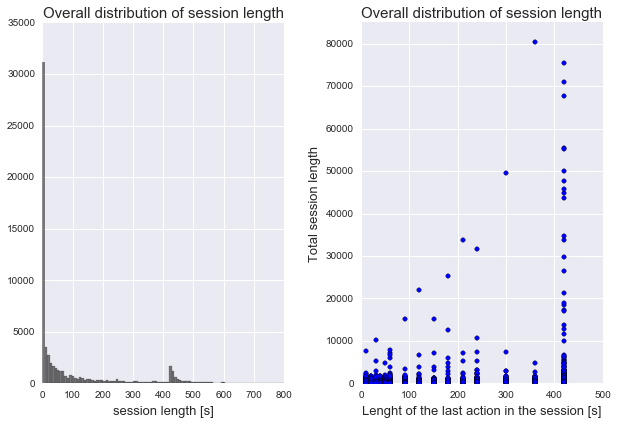

In [221]:
fig = plt.figure(figsize = [13,6])
bins = numpy.linspace(0, 800, 100)

plt.subplot(1,3,1)
session_start_end['session_lenght_seconds'].hist(color='k', alpha=0.5, bins=bins)
plt.xlabel('session length [s]', size=13)
plt.title('Overall distribution of session length', size=15)

plt.subplot(1,3,2)
plt.scatter(session_start_end['checkin_last_action'], session_start_end['session_lenght_seconds']);
plt.title('Overall distribution of session length', size=15)
plt.xlim([0, 500])
plt.ylim([0, 85000])

plt.xlabel('Lenght of the last action in the session [s]', size=13)
plt.ylabel('Total session length', size=13)

plt.tight_layout()
plt.show()

In [144]:
last_action_to_session = session_start_end['checkin_last_action']/session_start_end['session_lenght_seconds']

In [145]:
last_action_to_session.dropna(inplace=True)
len(last_action_to_session)

19139

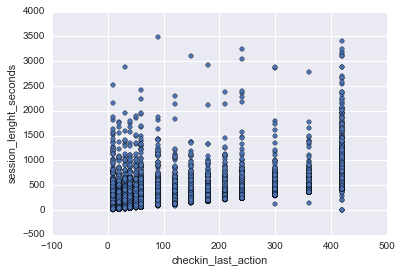

In [146]:
s = session_start_end[pd.notnull(session_start_end['checkin_last_action'])]
s = s[s['session_lenght_seconds']<3600]
s.plot(kind='scatter', x='checkin_last_action', y='session_lenght_seconds')

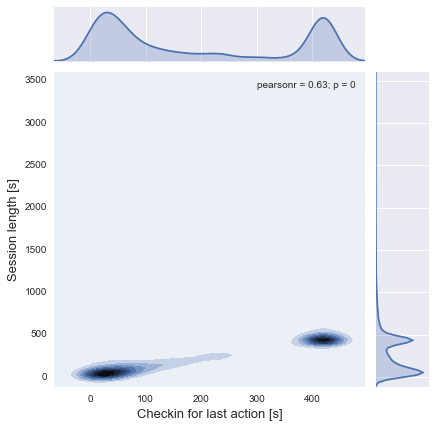

In [170]:

g = sns.jointplot(x="checkin_last_action", y="session_lenght_seconds", data=s, kind="kde");
g.set_axis_labels("Checkin for last action [s]", "Session length [s]", size=13);

In [148]:
m = s.as_matrix(columns=['checkin_last_action','session_lenght_seconds'])

In [165]:
within_cluster_SSE =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    random_state=0)
    kmeans.fit(m)
    within_cluster_SSE.append(kmeans.inertia_)

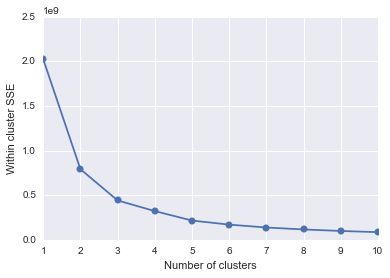

In [166]:
plt.plot(range(1,11), within_cluster_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE')
plt.show()

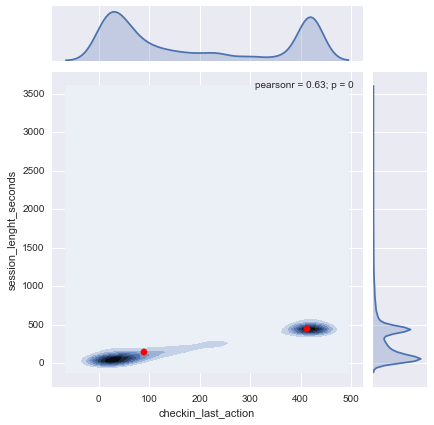

In [210]:
g = (sns.jointplot(x="checkin_last_action", y="session_lenght_seconds",
                   data=s, kind="kde")
         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

for pair in kmeans.cluster_centers_[0:2]:
    plt.scatter(pair[0],pair[1], s=40, color='red')
plt.show()
